In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score,roc_auc_score

In [ ]:
df=pd.read_csv(r"C:\Users\HI\Desktop\manichine learning.ipynb\NAVIE_Bayes_Project\Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df['Channel'].unique()

array([2, 1])

In [ ]:
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [ ]:
df['Channel'].value_counts().to_dict()

{1: 298, 2: 142}

In [ ]:
#3.  outlier and Extreme value

def count_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    outlier_condition=(col<Q1-1.5*IQR) |(col > Q3+1.5*IQR)
    return outlier_condition.sum()
cols=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for c in cols:
    print(f"{c:18}")

Fresh             
Milk              
Grocery           
Frozen            
Detergents_Paper  
Delicassen        


In [ ]:
#4.  EDA 

# Mean spending by channel – strongest differentiator
# 1 HOreca 2.Retail
df.groupby('Channel').mean().round(0)

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,3.0,13476.0,3452.0,3962.0,3748.0,791.0,1416.0
2,3.0,8904.0,10716.0,16323.0,1653.0,7270.0,1753.0


In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

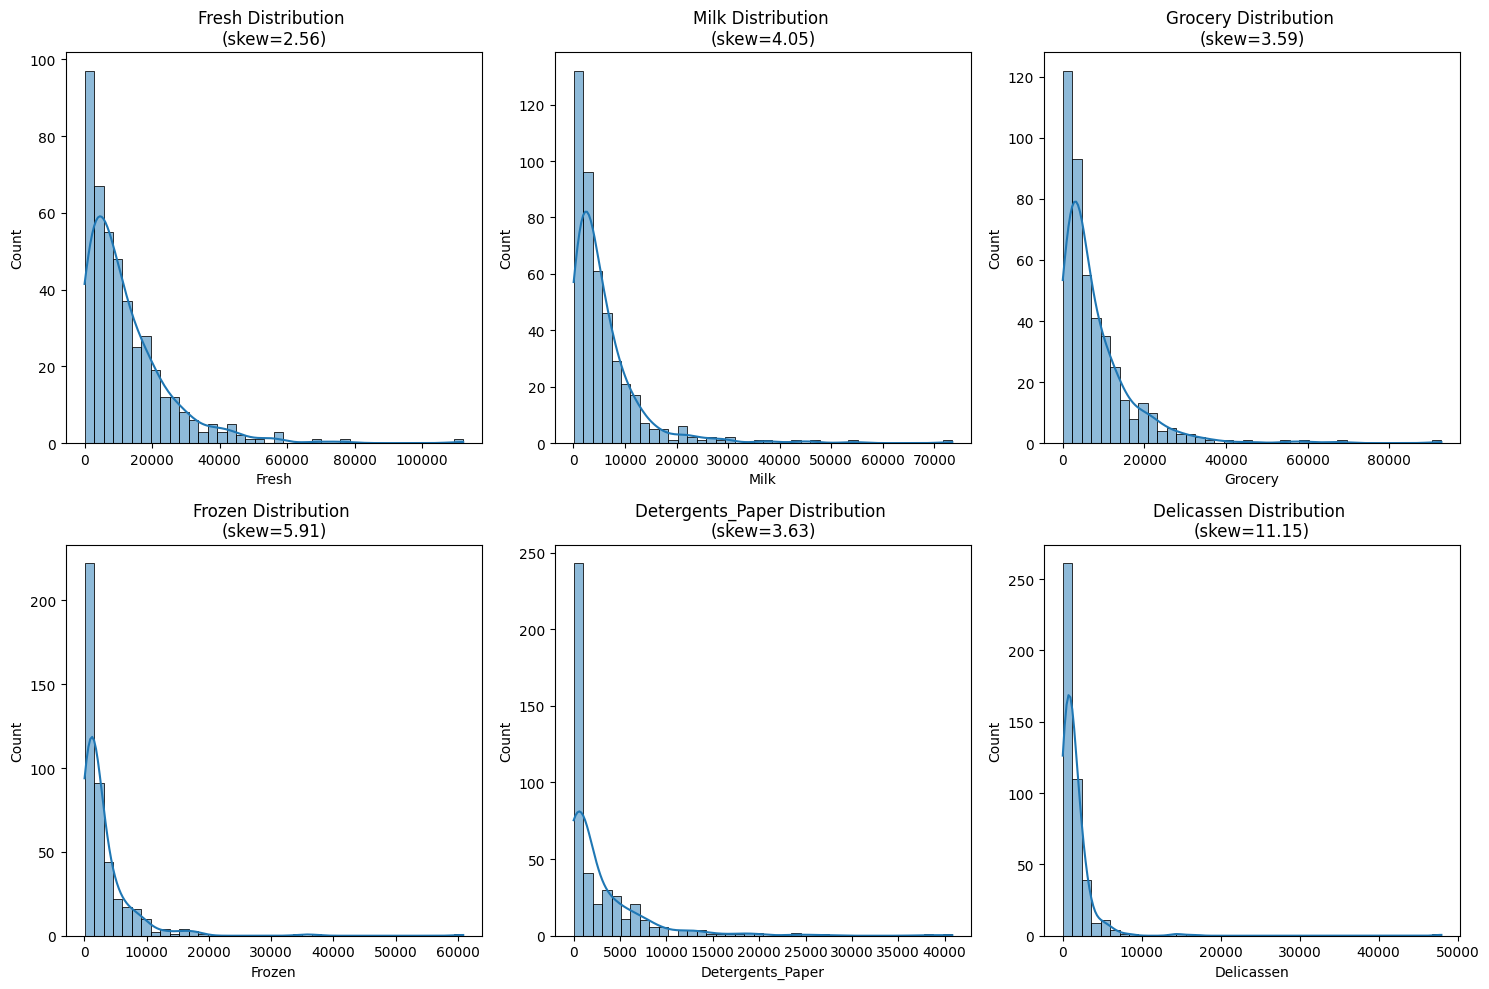

In [ ]:
# Distribution Histogram
plt.figure(figsize=(15,10))
for i,col in enumerate(['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'],1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],kde=True,bins=40)
    plt.title(f"{col} Distribution \n(skew={df[col].skew():.2f})")
plt.tight_layout()
plt.show()

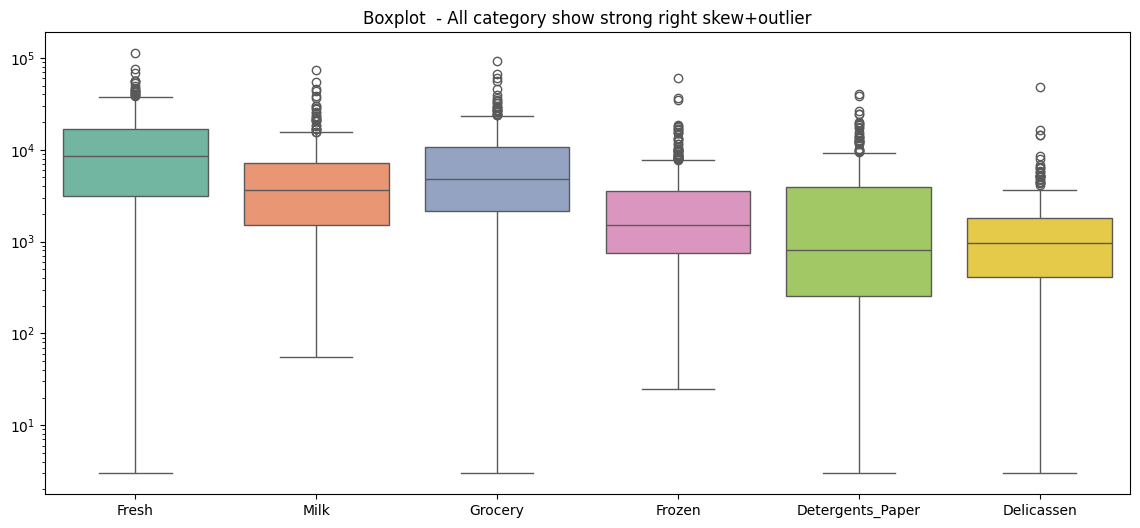

In [ ]:
# Boxplot

plt.figure(figsize=(14,6))
sns.boxplot(data=df[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']],palette='Set2')
plt.title("Boxplot  - All category show strong right skew+outlier")
plt.yscale("log")
plt.show()

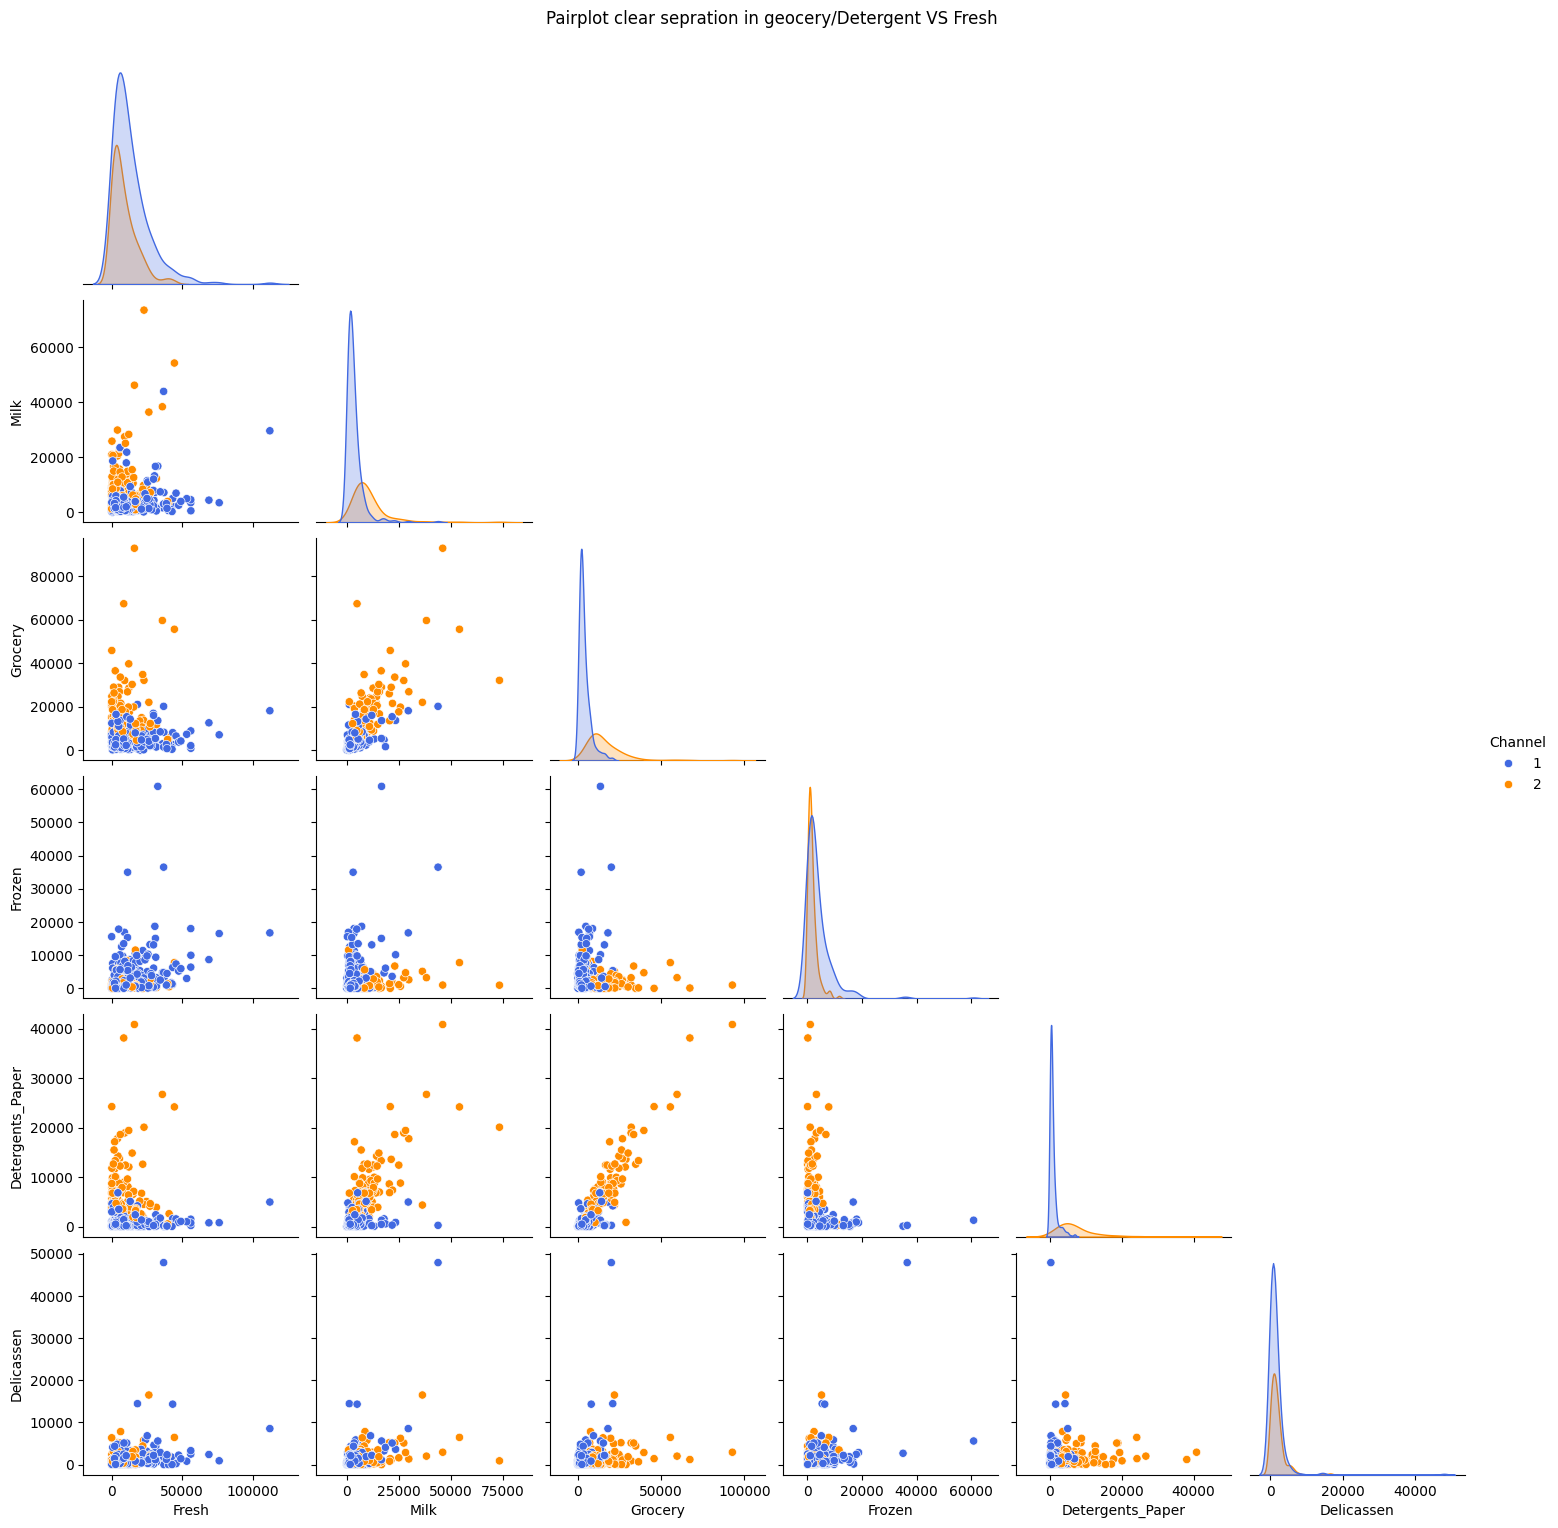

In [ ]:
# Pair plot(by Channel)

sns.pairplot(df.drop('Region',axis=1),hue='Channel',palette={1:'royalblue',2:'darkorange'},diag_kind='kde',corner=True)
plt.suptitle("Pairplot clear sepration in geocery/Detergent VS Fresh",y=1.02)
plt.show()


EDA ans

1 .Spending distributions → strongly right-skewed (skew > 2.5 in all), not Gaussian
2 . Highest variability → Frozen, Delicassen, Milk (highest std/mean ratio)
3. Best differentiators → Grocery + Detergents_Paper (Retail), Fresh (HORECA)
4. Business value → target high-Fresh = restaurants/hotels, high-Grocery = supermarkets


In [ ]:
# 5. Gaussian Naive Bayes Model
# log1 badi value ko compress karta ha fixes skew

x=np.log1p(df.drop(['Channel', 'Region'],axis=1))
y=df['Channel']



In [ ]:
# Model train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20,stratify=y)

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)


,priors,None
,var_smoothing,1e-09


In [ ]:
y_pred=gnb.predict(x_test)

Accuracy:93.6%(on log-trainsformd data)
Classsification Report
              precision    recall  f1-score   support

  HORECA (1)       1.00      0.91      0.95        75
  Rrtail (2)       0.83      1.00      0.91        35

    accuracy                           0.94       110
   macro avg       0.92      0.95      0.93       110
weighted avg       0.95      0.94      0.94       110

Confusion Matrix :


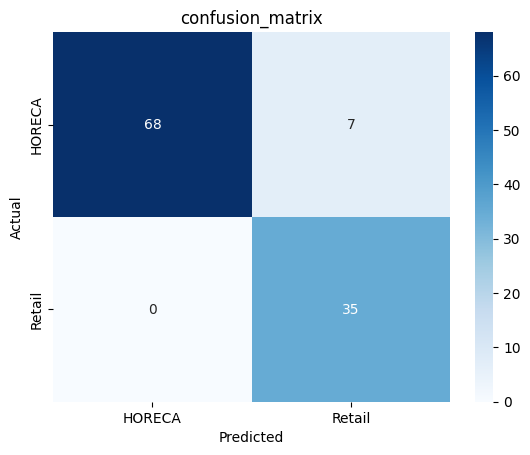

In [ ]:
#6.  Model Evaluation

acc =accuracy_score(y_test,y_pred)
print(f"Accuracy:{acc:.1%}(on log-trainsformd data)")

print("Classsification Report")
print(classification_report(y_test,y_pred,target_names=['HORECA (1)','Rrtail (2)']))

print("Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['HORECA','Retail'],yticklabels=['HORECA','Retail'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('confusion_matrix')
plt.show()

#7.  Business & Strategic Insights

1. Customer spending behavior clearly differentiates Retail and HORECA segments.
2. Grocery and Detergents_Paper are strong indicators of Retail customers.
3. Fresh product spending strongly signals HORECA customers.
4. Extreme spending values represent genuine high-value customers and should not be removed.
5. Log transformation successfully reduced skewness and improved Gaussian Naive Bayes performance.
6. The model achieves reliable classification accuracy on unseen data, making it suitable for automated customer segmentation.
7. Business teams can use these insights for targeted marketing, demand forecasting, and inventory optimization.

In [ ]:
with open("gnb.pkl","wb") as f:
    pickle.dump(gnb,f)
print("'GaussianNB model saved successfully !")

'GaussianNB model saved successfully !
